In [17]:
from __future__ import print_function
import os
from matplotlib import pyplot as plt
%matplotlib inline
data_path = ['C:\\Users\Yash\\CMPS 367 SP19']
print (data_path)
filepath = os.sep.join(data_path + ['twitter500.csv'])
print(filepath)

import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
df = pd.read_csv(filepath)

import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 100000)

y = df.pop('Buzz')

X = df
#X.shape

#y.shape

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(y.shape)



['C:\\Users\\Yash\\CMPS 367 SP19']
C:\Users\Yash\CMPS 367 SP19\twitter500.csv
(140707,)


In [18]:
df = df.reset_index(drop=True)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(shuffle=True, random_state=42)
SGDClassifier
import timeit
tic=timeit.default_timer()
print(y_train.shape)

sgd_clf.fit(X_train, y_train)
toc=timeit.default_timer() - tic
print("Train time in seconds for that classifier: ",toc)


#sgd_clf.predict(X_test.values.reshape(-1,1))


(112565,)
Train time in seconds for that classifier:  0.3922589579419764


[0.9461397  0.92092428 0.89203379]
[[82895  7436]
 [ 1603 20631]]
0.7350625289485873
0.927903211298012
0.8203017832647461


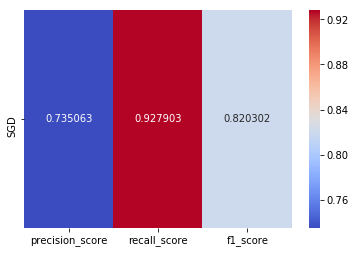

In [59]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(sgd_clf, X_train.values, y_train.values, cv=3, scoring="accuracy")
print(cvs)
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

from sklearn.metrics import precision_score, recall_score
ps = precision_score(y_train, y_train_pred)
print(ps) # == 4344 / (4344 + 1307)
rs = recall_score(y_train, y_train_pred)
print(rs) # == 4344 / (4344 + 1077)

from sklearn.metrics import f1_score
f1 = f1_score(y_train, y_train_pred)
print(f1)
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, 
    method="decision_function")

d = {'precision_score': [ps], 'recall_score': [rs], 
'f1_score': [f1]}

sgddf = pd.DataFrame(data=d, index = ['SGD'])

sns.heatmap(sgddf, annot=True, fmt="g", cmap='coolwarm')
plt.show()



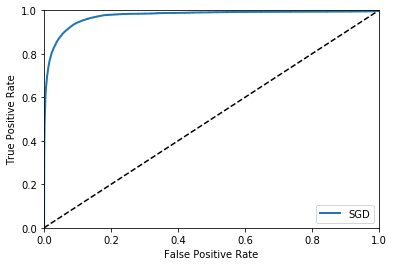

In [61]:
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label="SGD")
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()
from sklearn.metrics import classification_report


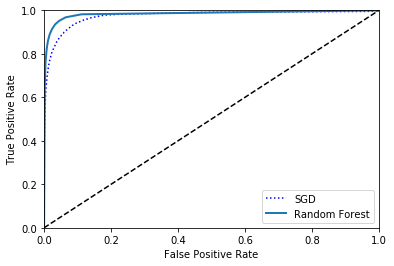

[0.96495483 0.96519283 0.96420671]
[[88809  1522]
 [ 2442 19792]]


In [33]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

from sklearn.model_selection import cross_val_score
print(cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy"))
from sklearn.model_selection import cross_val_predict
y_train_pred2 = cross_val_predict(forest_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred2))


0.9285915360795721
0.8901682108482504
0.9089740056948654


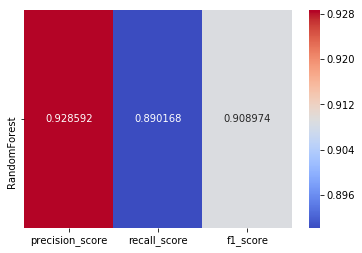

In [43]:
#randomforest
ps2 = precision_score(y_train, y_train_pred2)
print(ps2) # == 4344 / (4344 + 1307)
rs2 = recall_score(y_train, y_train_pred2)
print(rs2) # == 4344 / (4344 + 1077)
f12 = f1_score(y_train, y_train_pred2)
print(f12)

y_scores = cross_val_predict(forest_clf, X_train, y_train, cv=3)

d2 = {'precision_score': [ps2], 'recall_score': [rs2], 
'f1_score': [f12]}

ranfordf = pd.DataFrame(data=d2, index = ['RandomForest'])

sns.heatmap(ranfordf, annot=True, fmt="g", cmap='coolwarm')
plt.show()


In [35]:
# Random Forest classifier with 500 trees
from sklearn.ensemble import ExtraTreesClassifier
rnd_clf = ExtraTreesClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)


In [36]:
#Cell
from sklearn.model_selection import cross_val_score
print(cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy"))
from sklearn.model_selection import cross_val_predict
y_train_pred3 = cross_val_predict(rnd_clf, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred3))

[0.96687365 0.96751153 0.96700514]
[[88734  1597]
 [ 2124 20110]]


0.926429262449901
0.9044706305658001
0.9153182676771126


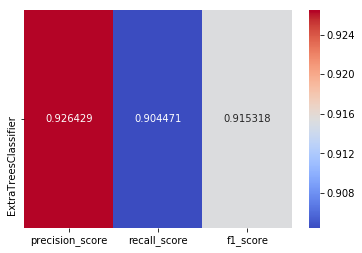

In [37]:
ps3 = precision_score(y_train, y_train_pred3)
print(ps3) # == 4344 / (4344 + 1307)
rs3 = recall_score(y_train, y_train_pred3)
print(rs3) # == 4344 / (4344 + 1077)
f13 = f1_score(y_train, y_train_pred3)
print(f13)

y_scores = cross_val_predict(forest_clf, X_train, y_train, cv=3)

d3 = {'precision_score': [ps3], 'recall_score': [rs3], 
'f1_score': [f13]}

extratreedf = pd.DataFrame(data=d3, index = ['ExtraTreesClassifier'])

sns.heatmap(extratreedf, annot=True, fmt="g", cmap='coolwarm')
plt.show()

y_scores = cross_val_predict(rnd_clf, X_train, y_train, cv=3)



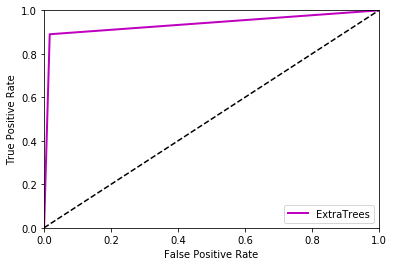

In [53]:
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'm',linewidth=2, label="ExtraTrees")
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()


In [46]:
from sklearn.linear_model import LogisticRegression
#Logistic Regression models can be regularized using ℓ1 or ℓ2 penalties. Scitkit-#Learn actually adds an ℓ2 penalty by default
log_reg = LogisticRegression(penalty='l2')
log_reg=log_reg.fit(X_train, y_train)
#print(y_test)
y_predict =log_reg.predict(X_test)
print(y_predict)

[0 1 0 ... 0 0 1]


In [56]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_reg, X_train, y_train, cv=3, scoring="accuracy"))
from sklearn.model_selection import cross_val_predict
y_train_pred4 = cross_val_predict(log_reg, X_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_train_pred4))

[0.96596754 0.96684523 0.96532608]
[[88996  1335]
 [ 2487 19747]]


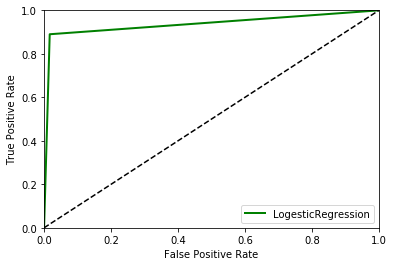

In [57]:
from sklearn.metrics import roc_curve
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr,'g', linewidth=2, label="LogesticRegression")
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

0.9366758372070961
0.8881442835297293
0.911764705882353


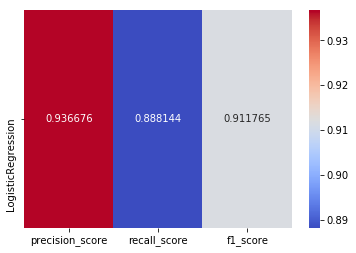

In [48]:
ps4 = precision_score(y_train, y_train_pred4)
print(ps4) # == 4344 / (4344 + 1307)
rs4 = recall_score(y_train, y_train_pred4)
print(rs4) # == 4344 / (4344 + 1077)
f14 = f1_score(y_train, y_train_pred4)
print(f14)

d4 = {'precision_score': [ps4], 'recall_score': [rs4], 
'f1_score': [f14]}

logredf = pd.DataFrame(data=d4, index = ['LogisticRegression '])

sns.heatmap(logredf, annot=True, fmt="g", cmap='coolwarm')
plt.show()


                      precision_score  recall_score  f1_score
SGD                          0.735063      0.927903  0.820302
RandomForest                 0.928592      0.890168  0.908974
ExtraTreesClassifier         0.926429      0.904471  0.915318
LogisticRegression           0.936676      0.888144  0.911765


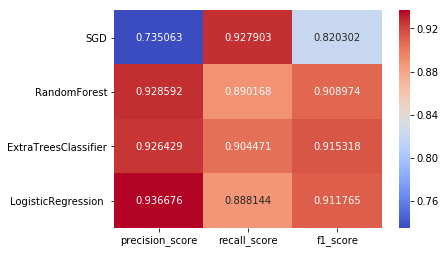

In [49]:
frames = [sgddf, ranfordf, extratreedf, logredf]
result = pd.concat(frames, axis=0, join='outer')
print(result)

sns.heatmap(result, annot=True, fmt="g", cmap='coolwarm')
plt.show()